# Numerical Optimization (CS215300) Assignment 2
## Introduction
In this assignment, we expect you to be familiar with the Pytorch optimizer library. We are using the Rosenbrock function as the benchmark of our optimization algorithms again. Since this is a simple test on very small scale, CUDA is not needed. You need to install Pytorch to acquire the pre-defined optimizers.  
The library document link: https://pytorch.org/docs/stable/optim.html

## Task
1. Please try different optimizers and observe the behavior of them, and try different hyperparameters and observe if they behave differently. (In case of L-BFGS, the parameters wrapped in this sample code won't work. If you want to try it anyway, you will need to write your own code.)
2. Whether if your setting converges or not, please justify it by experiment or your hyperthesis.
3. PLease answer the following question in your report:  
    (a) What is the relation between SGD and GD(gradient descent) in our case, i.e. when the input is one-dimensional?  
    (b) Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
4. Please write a concise report about your experiments and analysis. If you need to plot tables, please check the following link: https://www.tablesgenerator.com/markdown_tables

##  Advanced Technique: Learning rate scheduler
Another technique to find hyperparameter for learning rate is to perform scheduled adjestments of learning rate. This is called 'learning rate scheduler'. The adjestments here not only affected by current learning rate and momentum etc., but also the epoch number or step numbers. Usually, in these kind of method, we are presuming the optimal hyperparameters can be found by recognizing certain patterns, and we schedule the experiments to search the proper parameters in such manner. You can also apply these function in your code. The library document of learning rate scheduler is in the same link above.



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [6]:
def rosenbrock(tensor):
    # since pytorch uses tensor, we don't use built-in function here
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    last_f = torch.tensor([100., 100.])
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations'.format(optimizer_name, len(iter_x)))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

In [7]:
def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i=0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

In [8]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.SGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.2, 'momentum':0.2, 'weight_decay':0.1},
        num_iter=5000,
    )

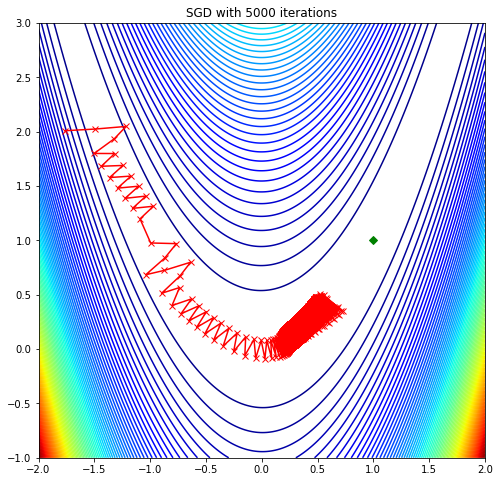

In [9]:
plot_rosenbrok(steps, optimizer_class.__name__)

In [10]:
printX(steps)

iteration 0: [-1.7659 2.0083]
iteration 1: [-1.4913 2.0240]
iteration 2: [-1.2161 2.0479]
iteration 3: [-1.3213 1.9346]
iteration 4: [-1.5018 1.7995]
iteration 5: [-1.3178 1.7986]
iteration 6: [-1.4375 1.6816]
iteration 7: [-1.2434 1.6890]
iteration 8: [-1.3635 1.5778]
iteration 9: [-1.1718 1.5911]
iteration 10: [-1.2927 1.4805]
iteration 11: [-1.1035 1.4981]
iteration 12: [-1.2246 1.3867]
iteration 13: [-1.0373 1.4074]
iteration 14: [-1.1582 1.2944]
iteration 15: [-0.9710 1.3137]
iteration 16: [-1.0909 1.1977]
iteration 17: [-0.9955 0.9760]
iteration 18: [-0.7650 0.9698]
iteration 19: [-0.8695 0.8374]
iteration 20: [-1.0397 0.6837]
iteration 21: [-0.8719 0.7243]
iteration 22: [-0.6379 0.7987]
iteration 23: [-0.7338 0.6717]
iteration 24: [-0.8984 0.5131]
iteration 25: [-0.7372 0.5657]
iteration 26: [-0.8043 0.4006]
iteration 27: [-0.6297 0.4618]
iteration 28: [-0.7243 0.3241]
iteration 29: [-0.5612 0.3993]
iteration 30: [-0.6541 0.2604]
iteration 31: [-0.4966 0.3433]
iteration 32: [-0.

iteration 3428: [0.5708 0.3124]
iteration 3429: [0.4544 0.4356]
iteration 3430: [0.5585 0.3052]
iteration 3431: [0.4856 0.4552]
iteration 3432: [0.6023 0.3343]
iteration 3433: [0.4678 0.4404]
iteration 3434: [0.5701 0.3085]
iteration 3435: [0.4470 0.4261]
iteration 3436: [0.5487 0.2938]
iteration 3437: [0.4712 0.4416]
iteration 3438: [0.5853 0.3185]
iteration 3439: [0.4551 0.4291]
iteration 3440: [0.5565 0.2965]
iteration 3441: [0.4429 0.4219]
iteration 3442: [0.5459 0.2906]
iteration 3443: [0.4695 0.4391]
iteration 3444: [0.5836 0.3160]
iteration 3445: [0.4534 0.4266]
iteration 3446: [0.5547 0.2938]
iteration 3447: [0.4401 0.4186]
iteration 3448: [0.5426 0.2869]
iteration 3449: [0.4655 0.4350]
iteration 3450: [0.5789 0.3113]
iteration 3451: [0.4500 0.4231]
iteration 3452: [0.5510 0.2902]
iteration 3453: [0.4384 0.4165]
iteration 3454: [0.5411 0.2849]
iteration 3455: [0.4610 0.4316]
iteration 3456: [0.5733 0.3070]
iteration 3457: [0.4466 0.4211]
iteration 3458: [0.5476 0.2881]
iteratio

## Report

In [ ]:
# Type your report here.
# 中英文皆可